# Project 0: Introduction to Aerodynamics and Python

#### Author: Jack Comey

##### Student ID: 915323775
##### Due Date: 2:00 PM Monday 19 OCT 2020

###### Code Imports and Basic Function Definition:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import handcalcs.render
plt.style.use("classic")

%matplotlib inline


# From solution document, modified slightly.

params={#FONT SIZES
    'axes.labelsize':30,#Axis Labels
    'axes.titlesize':30,#Title
    'font.size':28,#Textbox
    'xtick.labelsize':22,#Axis tick labels
    'ytick.labelsize':22,#Axis tick labels
    'legend.fontsize':24,#Legend font size
    'font.family':'serif',
    'font.fantasy':'xkcd',
    'font.sans-serif':'Helvetica',
    'font.monospace':'Courier',
    #AXIS PROPERTIES
    'axes.titlepad':2*6.0,#title spacing from axis
    'axes.grid':True,#grid on plot
    'figure.figsize':(12,12),#square plots
    'savefig.bbox':'tight',#reduce whitespace in saved figures#LEGEND PROPERTIES
    'legend.framealpha':0.5,
    'legend.fancybox':True,
    'legend.frameon':True,
    'legend.numpoints':1,
    'legend.scatterpoints':1,
    'legend.borderpad':0.1,
    'legend.borderaxespad':0.1,
    'legend.handletextpad':0.2,
    'legend.handlelength':1.0,
    'legend.labelspacing':0,}
mpl.rcParams.update(params)

#%%###########################

# Custom Functions

"""
I've used python extensively since February, and have created
several quality-of-life functions to simplify repeated blocks
of code. These are two which simplify plotting using matplotlib's
pyplot library.
"""

def plothusly(ax, x, y, *, xtitle='', ytitle='',
              datalabel='', title='', linestyle = '-',
              marker = ''):
    """
    A little function to make graphing easier.
    Creates a plot with titles and axis labels.
    Adds a new line to a blank figure and labels it.

    Parameters
    ----------
    ax : The graph object
    x : X axis data
    y : Y axis data
    xtitle : Optional x axis data title. The default is ''.
    ytitle : Optional y axis data title. The default is ''.
    datalabel : Optional label for data. The default is ''.
    title : Graph Title. The default is ''.

    Returns
    -------
    out : Resultant graph.

    """

    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)
    ax.set_title(title)
    out = ax.plot(x, y, zorder=1, label=datalabel, linestyle = linestyle,
                  marker = marker)
    return out


def plothus(ax, x, y, *, datalabel='', linestyle = '-',
              marker = ''):
    """
    A little function to make graphing easier.

    Adds a new line to a blank figure and labels it
    """
    out = ax.plot(x, y, zorder=1, label=datalabel, linestyle = linestyle,
                  marker = marker)
    return out



## 1 | Boundary Layers and Numeric Integration

### 1.1 |  Turbulent Boundary Layer and Velocity Profile

#### 1.1.1 | Approach

The primary task in **1.1** is to plot the non-dimensionalized form of a turbulent boundary layer, using the equation provided in the problem statement. Input $\frac{y}{\delta}$ can be defined as a series of points using numpy's linspace function. $\frac{u}{u_e}$ can be found through the equation listed in **1.1.2**. Using matplotlib's pyplot library, and a custom function listed in the preamble, the data can be plotted on an equally spaced axes, and the data axes labeled. 

Once this has beem done, an unmarked vertical line is to be plotted along the y-axis, and used to shade in the boundary layer. Arrows can then be drawn, at equally spaced intervals along the y-axis.


#### 1.1.2 | Equations

A non-dimensional fluid boundary layer is defined as the following:

$$\begin{equation}
    \frac{u}{u_e} \approx (\frac{y}{\delta})^{1/7}
\end{equation}$$

#### 1.1.3 | Code and Results



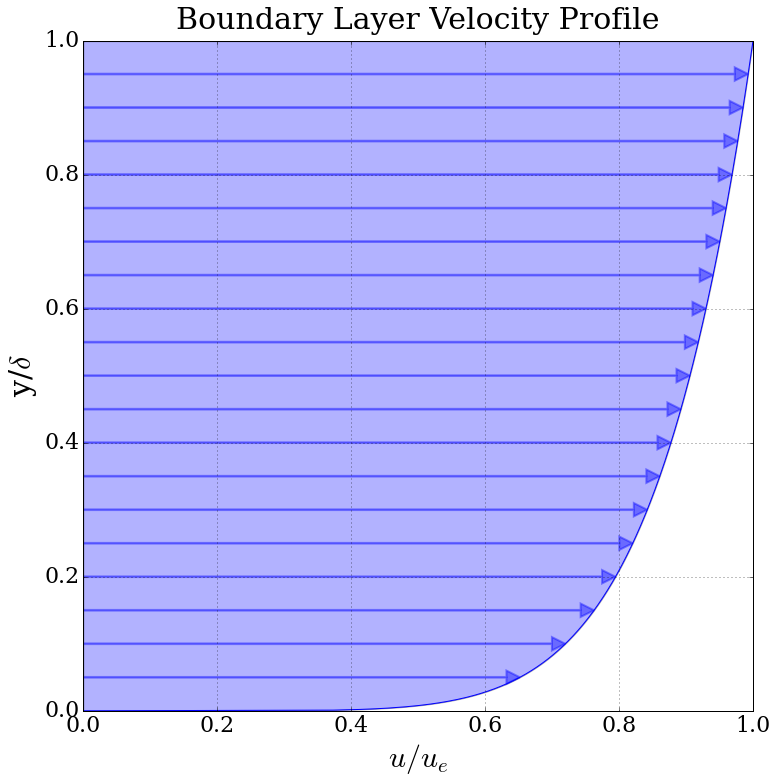

In [2]:
ynon = np.linspace(0, 1, 1000)
unon = ynon**(1/7)

fig, prob1aplot = plt.subplots()
plothusly(prob1aplot,
          unon,
          ynon,
          xtitle='$u/u_e$',
          ytitle='y/$\delta$',
          datalabel='Boundary layer',
          title='Boundary Layer Velocity Profile', 
          linestyle='solid')

# Shade in boundary layer
vline = ynon*0
plothus(prob1aplot, unon, vline, linestyle='-')
plt.fill_betweenx(ynon, vline, unon, facecolor='b', alpha=0.3)
plt.axis('equal')

# Make Arrows
arrowwidth, arrowlength = 0.02, 0.02

for i in range(0, len(ynon), 50):
    if abs(unon[i]) < arrowlength:
        plt.plot([0, unon[i]], [ynon[i], ynon[i]], color='b')
    else:
        plt.arrow(0, ynon[i], unon[i]-arrowlength, 0, head_width=arrowwidth,
                  head_length=arrowlength, color='b', linewidth=2, alpha=0.4)



### 1.2 | Boundary Layer Thickness


#### 1.2.1 | Approach

The goal of problem 1.2 is to find the boundary layer thickness $\delta$ given specific properties and an equation listed in the problem statement, and calculation of displacement thickness $\delta^*$ through numerical integration and a re-dimensionalization.

$\delta(x)$ can be defined as an anonymous function, and then found using $x$ as an input. $\frac{\delta^*}{\delta}$ can be found by integrating $1 - \frac{u}{u_e}$ with respect to $\frac{y}{\delta}$. The result can then be re-dimensionalized using the $\delta(x)$.


The output data is then placed into an f-string, which allows for variables to be placed into strings, and then printed to the console. 

#### 1.2.2 | Equations

Boundary layer thickness at $x$ is given by the equation:

$$\begin{equation}
    \delta(x) = \frac{0.16x}{(Re_x)^{1/7}}
\end{equation}$$

Displacement thickness $\delta^*$ can be found using:

$$\begin{equation}
    \frac{\delta^*}{\delta} = \int_0^1 (1-\frac{u}{u_e})\, d\frac{y}{\delta}
\end{equation}$$
#### 1.2.3 | Code and Results


In [3]:
# Problem 1b

# Input properties
Re = 1E8  # ndim
pos = 300  # ft

# Find non-dim delta-star
delta_star_non_dim = np.trapz(1 - unon, ynon)

# Set delta(x) as an anonymous function, and solve for x
delta_formula = lambda x : (0.16*x) / ((Re**(1/7)))
delta_point = delta_formula(pos)

# Dimensionalize delta-star, and print
delta_star = delta_star_non_dim * delta_point
string1 = f'Displacement thickness of {delta_star*12} in. for [Re={Re:1.1E}, L = {pos}ft]'
string2 = f'Boundary layer thickness: {delta_point*12} in'
print(string1)
print(string2)

Displacement thickness of 5.187717716704352 in. for [Re=1.0E+08, L = 300ft]
Boundary layer thickness: 41.45389476486636 in


## 2 | Airfoil Plotting and Line Integrals

### 2.1 | Airfoil Plotting 

#### 2.1.1 | Approach

The goal of Problem 2.1 is to distinctly plot three seperate airfoils, using files avaliable from a University of Illinois database. Each airfoil file in the database is provided as a .dat file. While .csv files are easily read by pandas, .dat files are more easily read by numpy.

Each .dat file can be modified to remove the header from the file, and then imported as an array. Each array is then placed into a pandas dataframe in order to store the data with headers. While the last step is not strictly necessary, it allows for easier access of data and better code readability. The three chosen airfoils are the Selig 6063, the Selig 8036, and the airfoil used on the Hawker Tempest at 37.5% semi-span. The three airfoils are then plotted using matplotlib's pyplot library, and differentiated on the plot through differing colors and linestyles. Each airfoil is also labeled on the plot itself.

#### 2.1.2 | Equations

No equations were used in this section, as it is primarily a plotting excersize.

#### 2.1.3 | Code and Results


(0.0, 1.0, -0.08, 0.09999999999999999)

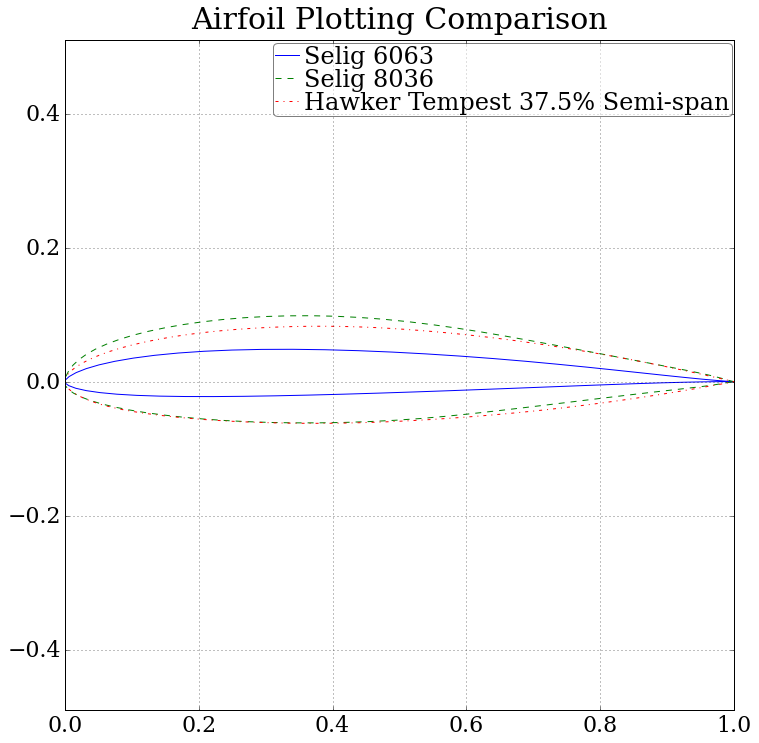

In [4]:
# Problem 2a

s6063 = np.loadtxt('Data/s6063.dat')
s8036 = np.loadtxt('Data/s8036.dat')
tempest = np.loadtxt('Data/tempest1.dat')
s6063df = pd.DataFrame(s6063)
s8036df = pd.DataFrame(s8036)
tempestdf = pd.DataFrame(tempest)


fig, airfoilplot = plt.subplots()
plothusly(airfoilplot, s6063df[0], s6063df[1], marker='', title = "Airfoil Plotting Comparison", linestyle='-', datalabel='Selig 6063')
plothus(airfoilplot, s8036df[0], s8036df[1], marker='', linestyle='--', datalabel='Selig 8036')
plothus(airfoilplot, tempestdf[0], tempestdf[1], marker='', linestyle='-.', datalabel='Hawker Tempest 37.5% Semi-span')
plt.legend(loc='best')
plt.axis('equal')

### 2.2 | Cross Sectional Area via Line Integration

#### 2.2.1 | Approach

The primary goal in Problem 2.2 is to find the cross-sectional area of a NACA 2412, with a chord length of 9.5 feet, through numeric integration. The area of any closed polygon can be calculated using Green's theorem, which defines the double integral as a line integral. As in the previous problem, the data from the .dat file can be imported using numpy, after removing the first line, and then transferred into a pandas Dataframe for easier calculations. The airfoil can be dimensionalized by multiplying each column by the chord length. The integral can then be calculated using numpy's np.trapz function, which uses trapezoidal integration.

#### 2.2.2 | Equations

Green's theorem is defined as:

$$\begin{equation}
    \iint_D dA = \frac{1}{2} \oint(-ydx + xdy) = \oint_C x \, dy
\end{equation}$$

#### 2.2.3 | Code and Results


In [5]:
# Problem 2b


c = 9.5  # ft, chord length
naca_2412_data = np.loadtxt('Data/naca2412_geom.dat', unpack=True, skiprows=1)
naca_2412_data *= c  # Redimensionalize
naca_2412_df = pd.DataFrame(naca_2412_data.transpose())
area = np.trapz(naca_2412_df[0], naca_2412_df[1])
string = f"""Cross-sectional area of NACA 2412 airfoil
with chord length {c} is {area} square feet"""
print(string)

Cross-sectional area of NACA 2412 airfoil
with chord length 9.5 is 7.190500819217841 square feet


## 3 | Airfoil Surface Pressure and Numeric Differentiation

### 3.1 | Airfoil Surface Pressure

#### 3.1.1 | Approach

The goal of Problem 3.1 is to plot the nondimensional surface pressure coefficient of a NACA 2412 airfoil, given a .csv file containing the data. Using pandas' read_csv() function, surface pressure coefficients and their corresponding positional data can be placed into a pandas dataframe directly from the file. To better visualize the effect of the pressure, the negative of the pressure constant C$_P$ is plotted, using matplotlib's pyplot library. Both the upper and lower curves are to be plotted as seperate curves, and labeled accordingly. 

#### 3.1.2 | Equations

No equations were used in this problem, as it is primarily a plotting excersize.

#### 3.1.3 | Code and Results


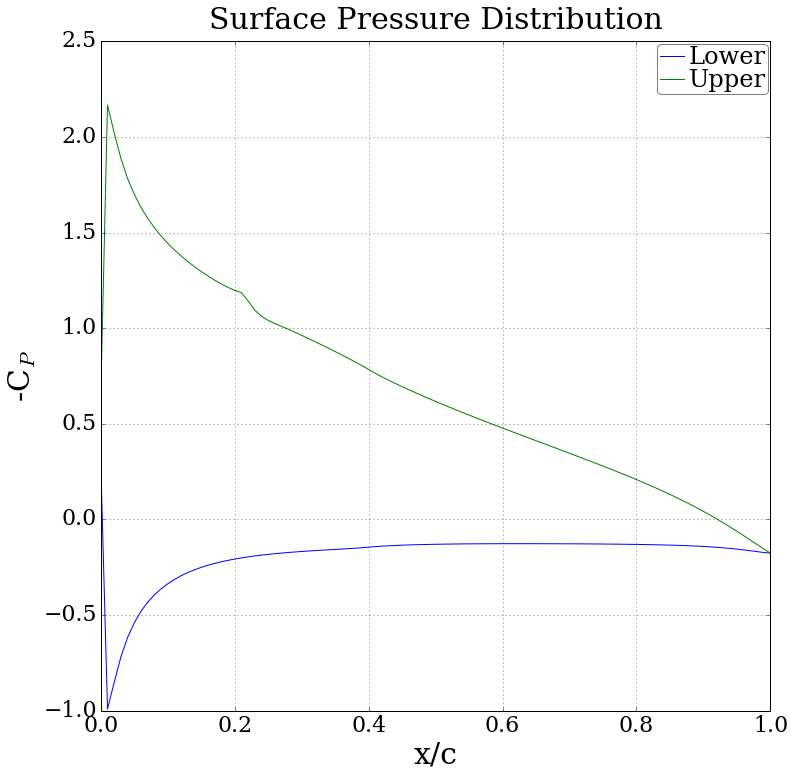

In [6]:
# Problem 3a 

# Read the data
pressure_distribution = pd.read_csv('Data/naca2412_SurfPress_a6.csv')

# Create a figure
fig, presdistplot = plt.subplots()


# Plot the line and add titles
plothusly(presdistplot,
          pressure_distribution["x"],
          -pressure_distribution["Cpl"],
          xtitle = 'x/c',
          ytitle='-C$_P$',
          title="Surface Pressure Distribution",
          datalabel='Lower',
          linestyle='-') 

# Plot the lower curve
plothus(presdistplot,
        pressure_distribution['x'],
        -pressure_distribution['Cpu'],
        datalabel='Upper',
        linestyle='-')
plt.legend(loc='best')

### 3.2 | Surface Pressure Gradient and Numeric Differentiation

#### 3.2.1 | Approach

The goal in Problem 3.2 is to find the spatial gradient of the surface pressure distribution, $\frac{\partial C_P}{\partial \frac{x}{c}}$, by using the data from the previous problem. The numerical derivative itself can be calculated using a first-order forward derivative. The "forward" refers to the method, in that the local derivative is calculated from index $i$, and the next point in the index $i+1$. The data can then be plotted using matplotlib's pyplot library.

#### 3.2.2 | Equations

Forward differentiation can be expressed as:

$$\begin{equation}
    (\frac{\partial C_P}{\partial \frac{x}{c}})_i = \frac{C_{P,i+1} - C_{P,i}}{\frac{x}{c}_{i+1} - \frac{x}{c}_i}
\end{equation}$$

#### 3.2.3 | Code and Results

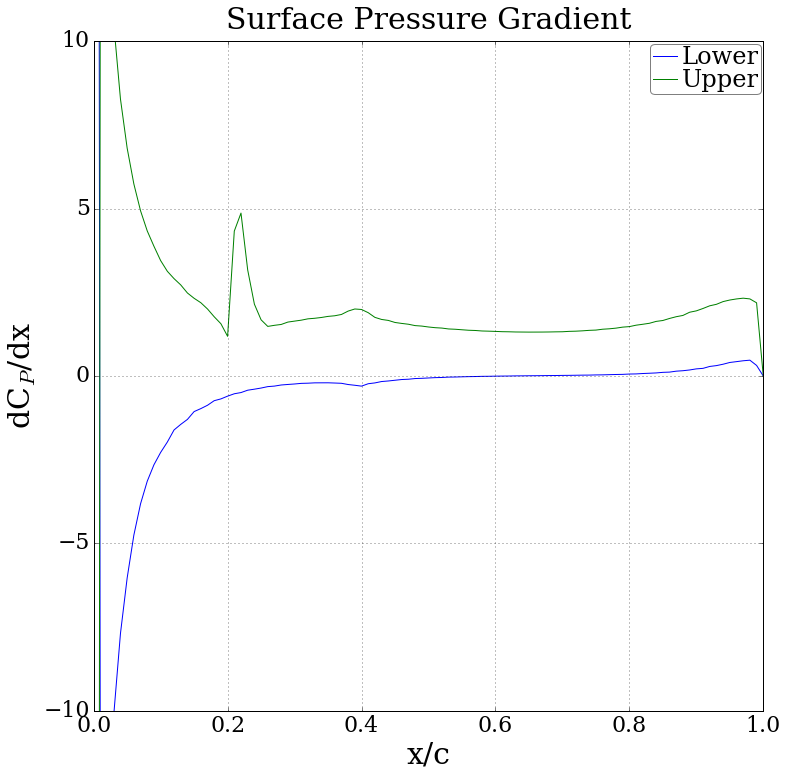

In [7]:
# Problem 3b

# Create placeholder vector for pressure gradient
pressure_gradient = np.zeros((len(pressure_distribution), 1))

# Determine gradient for each point for lower cp
for i in range(len(pressure_distribution)-1):
    pressure_gradient[i] = ((pressure_distribution["Cpl"][i+1] 
                             - pressure_distribution["Cpl"][i])
                            / (pressure_distribution['x'][i+1]
                               - pressure_distribution['x'][i]))
    
# Add to dataframe, reset buffer vector
pressure_distribution['Gradl'] = pressure_gradient
pressure_gradient *= 0
 
# Repeat last for loop for upper cp and add to dataframe
for i in range(len(pressure_distribution)-1):
    pressure_gradient[i] = ((pressure_distribution["Cpu"][i+1] 
                              - pressure_distribution["Cpu"][i])
                            / (pressure_distribution['x'][i+1]
                                - pressure_distribution['x'][i]))

pressure_distribution['Gradu'] = pressure_gradient


# Create plot
fig, presgradplot = plt.subplots()

plothusly(presgradplot, pressure_distribution["x"],
          pressure_distribution["Gradl"], xtitle = 'x/c',
          ytitle='dC$_P$/dx', title="Surface Pressure Gradient",
          datalabel='Lower', linestyle='-') 

plothus(presgradplot, pressure_distribution['x'],
        pressure_distribution['Gradu'], datalabel='Upper',
        linestyle='-')
plt.xlim([0, 1])
plt.ylim([-10, 10])
plt.legend(loc='best')

## 4 | Lift Curves and Linear Interpolation

### 4.1 Lift Curve and Excel Files

#### 4.1.1 | Approach

The goal in Problem 4.1 is to plot a lift curve for a NACA 2412 airfoil, using data provided in a .xlsx file. The file is read through pandas' read_excel function, and then the data is plotted using matplotlib's pyplot library, in a manner similar to the previous problems. 

#### 4.1.2 | Equations

No equations were used in this problem, as it is purely a plotting excersize.

#### 4.1.3 | Code and Results

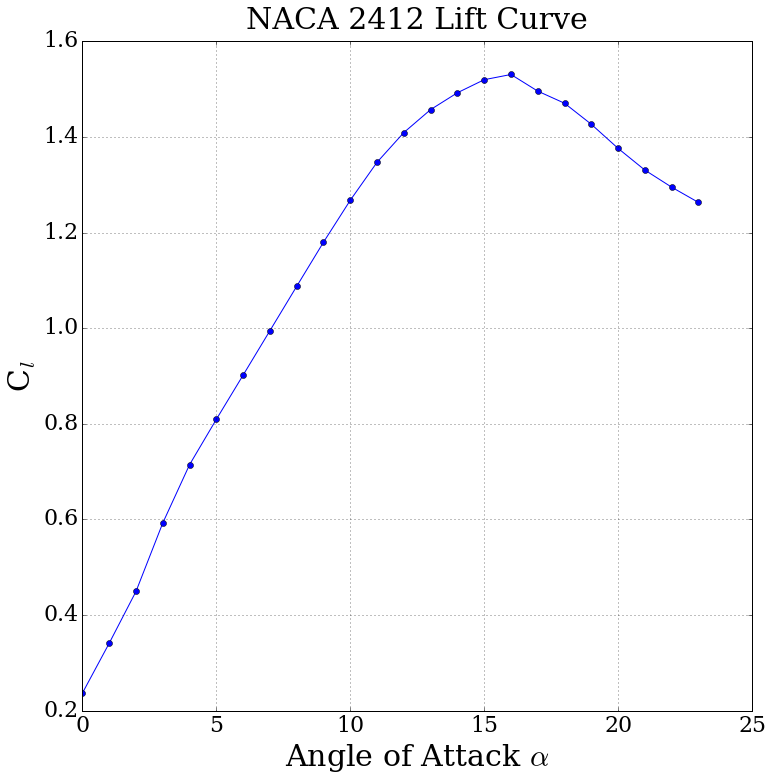

In [8]:
# Problem 4a

naca_2412_lift_curve = pd.read_excel("Data/naca2412_LiftCurve.xlsx")
fig, liftplot = plt.subplots()
plothusly(liftplot, naca_2412_lift_curve['alpha'], naca_2412_lift_curve["Cl"],
          xtitle=r'Angle of Attack $\alpha$', ytitle=r'C$_l$',
          title='NACA 2412 Lift Curve', marker='o')

### 4.2 | Linear Interpolation

#### 4.2.1 | Approach

The goal in Problem 4.2 is to use linear interpolation to find the C$_l$ value at $\alpha = 5.65$ degrees. This can be done with numpy's interp function, which linearly interpolates using two sets of input data. Using the given alpha value, and indexing using the $\alpha$ column, the interpolated value for C$_l$ can be found, and then printed to console using an f-string.

#### 4.2.2 | Equations

There were no equations used in this problem, as it is primarily a tutorial on numpy's interpolation function.

#### 4.2.3 | Code and Results

The interpolated value is calculated, and then printed to console.

In [9]:
c_l_interpolated = np.interp(5.65, naca_2412_lift_curve["alpha"],
                             naca_2412_lift_curve["Cl"])
string = rf"Interpolated C_l at alpha = 5.65 deg is {c_l_interpolated}"
print(string)

Interpolated C_l at alpha = 5.65 deg is 0.8695250000000001


## 5 |Linear Algebra


#### 5.1 | Approach

The goal for Problem 5.1 is to use numpy's linalg.solve() function to solve for a system of equations. The system is placed in matrix form, and placed into a numpy array. The solution is similarly placed into matrix form, and placed in a numpy array. The system is then solved using numpy's linalg.solve() function, and the solution vector is printed to the terminal.

#### 5.2 | Equations

The system of equation can be expressed in the form:

$$\begin{equation}
    A \lambda = b
\end{equation}$$

as:

$$\begin{equation}
    \begin{bmatrix}
        1&2&3&4\\
        3&2&-2&3\\
        0&1&1&0\\
        2&1&1&-2\\
    \end{bmatrix} \begin{bmatrix}
    w\\
    x\\
    y\\
    z\\
    \end{bmatrix} = \begin{bmatrix}
        12\\
        10\\
        -1\\
        -5\\
    \end{bmatrix}
\end{equation}$$

and solved as:



$$\begin{equation}
    \lambda = A^{-1}b
\end{equation}$$

#### 5.3 | Code and Results

In [10]:
A = np.array([[1, 2, 3, 4],
              [3, 2, -2, 3],
              [0, 1, 1, 0],
              [2, 1, 1, -2]])
b = np.array([[12],
              [10],
              [-1],
              [-5]])
x = np.linalg.solve(A, b)
print(f'x = {x}')

x = [[ 1.15384615]
 [-1.23076923]
 [ 0.23076923]
 [ 3.15384615]]
